## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action= 'ignore')

## Import data

In [3]:
df = pd.read_csv('drug200.csv')

## Displaying top 5 records for overview

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## Obtaining information of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## Checking missing values

In [7]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

## Checking duplicate values

In [8]:
df.duplicated().sum()

0

## Exploring unique values

In [9]:
df.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

## Visualisation

<Axes: xlabel='Cholesterol', ylabel='count'>

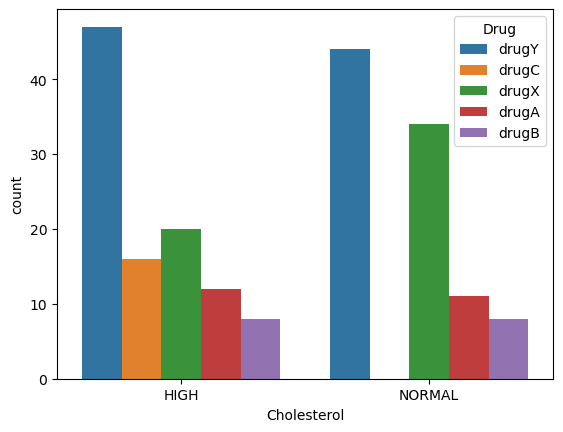

In [15]:
sns.countplot(data = df, x = "Cholesterol", hue = "Drug")

## Predictive Model

In [18]:
df['Sex'].value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

In [19]:
df['BP'].value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [20]:
df['Cholesterol'].value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

label_sex = le.fit_transform(df['Sex'])

# drop old columns and replace new ones
df.drop("Sex", axis=1, inplace=True)
 
df["Sex"] = label_sex

list(le.classes_)
#F = 0     #M = 1

[0, 1]

In [42]:
label_BP = le.fit_transform(df['BP'])
df.drop("BP", axis=1, inplace=True)
df["BP"] = label_BP

list(le.classes_)

['HIGH', 'LOW', 'NORMAL']

In [43]:
label_chol = le.fit_transform(df['Cholesterol'])
df.drop("Cholesterol", axis=1, inplace=True)
df["Cholesterol"] = label_chol

list(le.classes_)

['HIGH', 'NORMAL']

In [44]:
df.head()

,Age,Na_to_K,Drug,Sex,BP,Cholesterol
0,23,25.355,drugY,0,0,0
1,47,13.093,drugC,1,1,0
2,47,10.114,drugC,1,1,0
3,28,7.798,drugX,0,2,0
4,61,18.043,drugY,0,1,0


## Split the data into dependent and independent variable 

In [45]:
X = df.drop('Drug',axis=1)
y = df.Drug

In [46]:
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

## Splitting the dataset into training and testing sets

In [61]:
from sklearn.model_selection import train_test_split , GridSearchCV

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
model = DecisionTreeClassifier()

In [58]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [59]:
y_pred = model.predict(X_test)

## Accuracy score

In [60]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_score(y_test,y_pred)

1.0

## Hyperparameter tuning

In [68]:
param_grid={
    
    'max_depth': [2,3,4,5,6],
    'min_samples_split' : [2,3,4,5],
    'min_samples_leaf' : [2,3,4]

}

In [69]:
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=5)

In [70]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5]})

In [72]:
# Best parameter
grid_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

## Plotting Desicion tree

In [73]:
from sklearn.tree import plot_tree